In [ ]:
# https://partrita.github.io/posts/ANOVA-python/

# ANOVA (ANalysis Of VAriance; 분산 분석)
# => 여러 그룹간의 평균의 차이가 통계적으로 유의미 한지를 판단하기 위한 시험법입니다. 
#    T-test 처럼 말이죠. 하지만 그룹의 수가 2개 이상일때 사용한다는 점이 다른점이죠.

# 분산분석에는 다음과 같은 3가지의 조건이 필요해요.

# 정규성 : 각각의 그룹에서 변인은 정규분포.
# 분산의 동질성 : Y의 모집단 분산은 각각의 모집단에서 동일.
# 관찰의 독립성: 각각의 모집단에서 크기가 각각인 표본들이 독립적으로 표집.


In [1]:
import numpy as np

In [3]:
x = np.genfromtxt("data/altman_910.txt", delimiter=",")
x

array([[243.,   1.],
       [251.,   1.],
       [275.,   1.],
       [291.,   1.],
       [347.,   1.],
       [354.,   1.],
       [380.,   1.],
       [392.,   1.],
       [206.,   2.],
       [210.,   2.],
       [226.,   2.],
       [249.,   2.],
       [255.,   2.],
       [273.,   2.],
       [285.,   2.],
       [295.,   2.],
       [309.,   2.],
       [241.,   3.],
       [258.,   3.],
       [270.,   3.],
       [293.,   3.],
       [328.,   3.]])

In [ ]:
group1 = data[data[:, 1] == 1, 0]
group2 = data[data[:, 1] == 2, 0]
group3 = data[data[:, 1] == 3, 0]

In [5]:
x[:, 1] == 1

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

array([243., 251., 275., 291., 347., 354., 380., 392.])

In [12]:
group1 = x[x[:, 1] == 1, 0]
group2 = x[x[:, 1] == 2, 0]
group3 = x[x[:, 1] == 3, 0]
group1, group2, group3

(array([243., 251., 275., 291., 347., 354., 380., 392.]),
 array([206., 210., 226., 249., 255., 273., 285., 295., 309.]),
 array([241., 258., 270., 293., 328.]))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6e5ef11a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6e5ef22190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6e5ef11730>,
 'medians': [<matplotlib.lines.Line2D at 0x7f6e5ef22880>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6e5ef22be0>,
 'means': []}

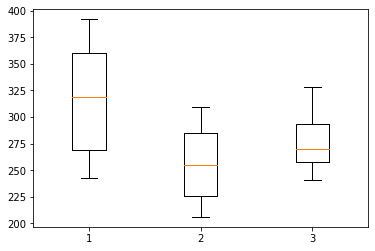

In [17]:
import matplotlib.pyplot as plt
plt.boxplot([group1, group2, group3])

In [20]:
print("# 일원 분산 분석")

# 일원 분산 분석


In [ ]:
# scipy.stats

In [18]:
from scipy import stats
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3.7113359882669763, pvalue=0.043589334959178244)

In [22]:
_, pval = stats.f_oneway(group1, group2, group3)
if pval < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


In [ ]:
# statsmodels

In [29]:
import pandas as pd
df = pd.DataFrame(x, columns=['value', 'treatment'])
df

,value,treatment
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0
5,354.0,1.0
6,380.0,1.0
7,392.0,1.0
8,206.0,2.0
9,210.0,2.0


In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
model = ols('value ~ C(treatment)', df).fit()

In [38]:
sm.stats.anova_lm(model) # anova_lm => anova linear model

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),2.0,15515.766414,7757.883207,3.711336,0.043589
Residual,19.0,39716.097222,2090.320906,NaN,NaN


In [39]:
 ols('value ~ C(treatment)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     3.711
Date:                Tue, 06 Apr 2021   Prob (F-statistic):             0.0436
Time:                        07:10:10   Log-Likelihood:                -113.70
No. Observations:                  22   AIC:                             233.4
Df Residuals:                      19   BIC:                             236.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             316.6250     16.164     19.588      0.000     282.792     350.458
C(treatment)[T.2.0]   -60.1806     22.216     -2.709      0.014    -106.679     -13.682
C(treatment)[T.3.0]   -38.6250     26.064     -1.482      0.155     -93.178      15.928
==============================================================================
Omnibus:                        2.618   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.189
Skew:                           0.021   Prob(JB):                        0.552
Kurtosis:                       1.862   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print("# 이원 분산 분석") # 관측값이 두개 이상일 경우

# 이원 분산 분석


In [2]:
import numpy as np
x = np.genfromtxt("data/altman_12_6.txt", delimiter=",")
x

array([[14.3,  1. ,  1. ],
       [14. ,  1. ,  1. ],
       [14.8,  1. ,  1. ],
       [13.6,  1. ,  2. ],
       [13.6,  1. ,  2. ],
       [13.8,  1. ,  2. ],
       [13.9,  1. ,  3. ],
       [13.7,  1. ,  3. ],
       [13.8,  1. ,  3. ],
       [13.8,  1. ,  4. ],
       [14.7,  1. ,  4. ],
       [13.9,  1. ,  4. ],
       [19.7,  2. ,  1. ],
       [19.9,  2. ,  1. ],
       [19.8,  2. ,  1. ],
       [19.8,  2. ,  2. ],
       [19.3,  2. ,  2. ],
       [19.8,  2. ,  2. ],
       [19.5,  2. ,  3. ],
       [19.8,  2. ,  3. ],
       [19.5,  2. ,  3. ],
       [19.8,  2. ,  4. ],
       [19.6,  2. ,  4. ],
       [19.8,  2. ,  4. ],
       [13. ,  3. ,  1. ],
       [12.6,  3. ,  1. ],
       [12.9,  3. ,  1. ],
       [12.4,  3. ,  2. ],
       [12.8,  3. ,  2. ],
       [12.5,  3. ,  2. ],
       [12.8,  3. ,  3. ],
       [12.7,  3. ,  3. ],
       [12.5,  3. ,  3. ],
       [13. ,  3. ,  4. ],
       [12.9,  3. ,  4. ],
       [13.8,  3. ,  4. ]])

In [3]:
import pandas as pd
df = pd.DataFrame(x, columns=['head_size', 'fetus', 'observer'])
df

,head_size,fetus,observer
0,14.3,1.0,1.0
1,14.0,1.0,1.0
2,14.8,1.0,1.0
3,13.6,1.0,2.0
4,13.6,1.0,2.0
5,13.8,1.0,2.0
6,13.9,1.0,3.0
7,13.7,1.0,3.0
8,13.8,1.0,3.0
9,13.8,1.0,4.0


<AxesSubplot:title={'center':'head_size'}, xlabel='fetus'>

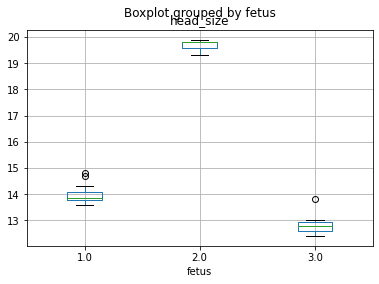

In [46]:
df.boxplot(column = 'head_size', by='fetus')

In [54]:
from IPython import display
display.Image(url="https://t1.daumcdn.net/cfile/tistory/99811D485EBFA00C2B")

In [ ]:
# 참조 - https://rfriend.tistory.com/136

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)", df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(fetus),2.0,324.008889,162.004444,2113.101449,1.051039e-27
C(observer),3.0,1.198611,0.399537,5.211353,6.497055e-03
C(fetus):C(observer),6.0,0.562222,0.093704,1.222222,3.295509e-01
Residual,24.0,1.840000,0.076667,NaN,NaN


In [5]:
model = ols("head_size ~ C(fetus) + C(observer) + C(observer):C(fetus)", df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(fetus),2.0,324.008889,162.004444,2113.101449,1.051039e-27
C(observer),3.0,1.198611,0.399537,5.211353,6.497055e-03
C(observer):C(fetus),6.0,0.562222,0.093704,1.222222,3.295509e-01
Residual,24.0,1.840000,0.076667,NaN,NaN


In [59]:
result = """
# 교효작용 (interaction effect 상호 작용 효과)
C(observer),C(fetus)  :  태아와 관찰자에 따른 교호작용효과에 대한 P-value가 0.33으로 귀무가설 H0를 채택 
                         -> 관찰자와 태아의 교효작용(interaction effect)에 의한 효과는 없다
  
# 주 효과 (main effect)
C(fetus)    : 태아에 따른 따른 (머리크기의) 통계학 차이가 있다.
C(observer) : 관찰자에 따른 통계학 차이가 있다.
"""

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("head_size ~ C(fetus) * C(observer)", df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(fetus),2.0,324.008889,162.004444,2113.101449,1.051039e-27
C(observer),3.0,1.198611,0.399537,5.211353,6.497055e-03
C(fetus):C(observer),6.0,0.562222,0.093704,1.222222,3.295509e-01
Residual,24.0,1.840000,0.076667,NaN,NaN


In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("head_size ~ C(fetus, Sum) * C(observer, Sum)", df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
"C(fetus, Sum)",2.0,324.008889,162.004444,2113.101449,1.051039e-27
"C(observer, Sum)",3.0,1.198611,0.399537,5.211353,6.497055e-03
"C(fetus, Sum):C(observer, Sum)",6.0,0.562222,0.093704,1.222222,3.295509e-01
Residual,24.0,1.840000,0.076667,NaN,NaN


In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              head_size   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     386.3
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.29e-24
Time:                        07:38:52   Log-Likelihood:                 2.4458
No. Observations:                  36   AIC:                             19.11
Df Residuals:                      24   BIC:                             38.11
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             14.3667      0.160     89.870      0.000      14.037      14.697
C(fetus)[T.2.0]                        5.4333      0.226     24.033      0.000       4.967       5.900
C(fetus)[T.3.0]                       -1.5333      0.226     -6.782      0.000      -2.000      -1.067
C(observer)[T.2.0]                    -0.7000      0.226     -3.096      0.005      -1.167      -0.233
C(observer)[T.3.0]                    -0.5667      0.226     -2.507      0.019      -1.033      -0.100
C(observer)[T.4.0]                    -0.2333      0.226     -1.032      0.312      -0.700       0.233
C(fetus)[T.2.0]:C(observer)[T.2.0]     0.5333      0.320      1.668      0.108      -0.127       1.193
C(fetus)[T.3.0]:C(observer)[T.2.0]     0.4333      0.320      1.355      0.188      -0.227       1.093
C(fetus)[T.2.0]:C(observer)[T.3.0]     0.3667      0.320      1.147      0.263      -0.293       1.027
C(fetus)[T.3.0]:C(observer)[T.3.0]     0.4000      0.320      1.251      0.223      -0.260       1.060
C(fetus)[T.2.0]:C(observer)[T.4.0]     0.1667      0.320      0.521      0.607      -0.493       0.827
C(fetus)[T.3.0]:C(observer)[T.4.0]     0.6333      0.320      1.981      0.059      -0.027       1.293
==============================================================================
Omnibus:                        3.922   Durbin-Watson:                   2.753
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.759
Skew:                           0.654   Prob(JB):                        0.252
Kurtosis:                       3.356   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
import statsmodels
dir (statsmodels)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__init__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'api',
 'base',
 'compat',
 'datasets',
 'debug_warnings',
 'discrete',
 'distributions',
 'duration',
 'emplike',
 'formula',
 'gam',
 'genmod',
 'graphics',
 'imputation',
 'iolib',
 'multivariate',
 'nonparametric',
 'regression',
 'robust',
 'sandbox',
 'stats',
 'test',
 'tools',
 'tsa']